In [ ]:
!pip install nltk


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import random

In [ ]:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('english')

print(stop_words)



['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/CSV files/emails.csv')

In [ ]:
df_main = dataset.drop(columns=["Email No.", "Prediction"])

print(df_main.sample(20))

      the  to  ect  and  for  of    a  you  hou   in  ...  enhancements  \
1038   11   7   11   11   16   0   98    3    4   11  ...             0   
2401    0   4    2    0    3   2   47    0    2    9  ...             0   
3666    1   0    1    3    0   0   13    1    0    3  ...             0   
20      0   0    1    1    0   0   15    1    0    2  ...             0   
1152    0   9    4    0    2   1   43    0    0    9  ...             0   
2364    0   4    1    2    0   2   21    0    1    2  ...             0   
4244    1   0    1    0    0   0    6    0    0    0  ...             0   
3358    4   3    1    2    2   0   11    1    0    3  ...             0   
2765    0   0    1    0    1   0    5    0    0    0  ...             0   
40      2   3    1    5    1   0   45    0    0    8  ...             0   
2299    3   3    1    1    1   0   14    1    1    3  ...             0   
2266    0   0    1    0    1   0    2    0    0    0  ...             0   
2160   14  11    6    2  

In [ ]:
type(stop_words)

filter = [item for item in df_main.columns if item not in stop_words]

print(filter)
print(len(df_main.columns)) # Changed df_columns to df_main.columns
print(len(filter))

['ect', 'hou', 'enron', 'com', 'gas', 'deal', 'meter', 'hpl', 'please', 'e', 'corp', 'know', 'need', 'forwarded', 'new', 'may', 'j', 'mmbtu', 'get', 'see', 'price', 'daren', 'company', 'l', 'let', 'would', 'xls', 'farmer', 'attached', 'us', 'information', 'message', 'day', 'time', 'one', 'http', 'th', 'volume', 'mail', 'contract', 'month', 'robert', 'sitara', 'texas', 'nom', 'energy', 'pec', 'questions', 'www', 'deals', 'volumes', 'pm', 'ena', 'file', 'email', 'also', 'call', 'change', 'like', 'b', 'flow', 'net', 'following', 'p', 'production', 'back', 'want', 'original', 'ticket', 'c', 'could', 'make', 'inc', 'report', 'march', 'contact', 'days', 'list', 'nomination', 'system', 'april', 'number', 'sale', 'first', 'thanks', 'business', 'help', 'per', 'july', 'forward', 'font', 'free', 'daily', 'use', 'order', 'today', 'r', 'fw', 'set', 'plant', 'statements', 'go', 'gary', 'oil', 'line', 'sales', 'w', 'effective', 'well', 'tenaska', 'take', 'june', 'x', 'within', 'nbsp', 'north', 'ameri

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/CSV files/emails.csv')

In [17]:
df = pd.DataFrame(dataset, columns=filter)
print(len(df.columns))

2866


In [18]:
from tensorflow.keras.layers import Dense, Softmax

italicized text## Approach 1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8379 - loss: 0.3752 - val_accuracy: 0.9691 - val_loss: 0.0652
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9882 - loss: 0.0307 - val_accuracy: 0.9768 - val_loss: 0.0438
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9966 - loss: 0.0118 - val_accuracy: 0.9730 - val_loss: 0.0615
Epoch 4/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9989 - loss: 0.0053 - val_accuracy: 0.9768 - val_loss: 0.0584
Epoch 5/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9947 - loss: 0.0119 - val_accuracy: 0.9691 - val_loss: 0.0782
Epoch 6/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9981 - loss: 0.0067 - val_accuracy: 0.9730 - val_loss: 0.0918
Epoch 7/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9948 - loss: 0.0133 - val_accuracy: 0.9691 - val_loss: 0.1184
Epoch 8/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9967 - loss: 0.0102 - val_accuracy

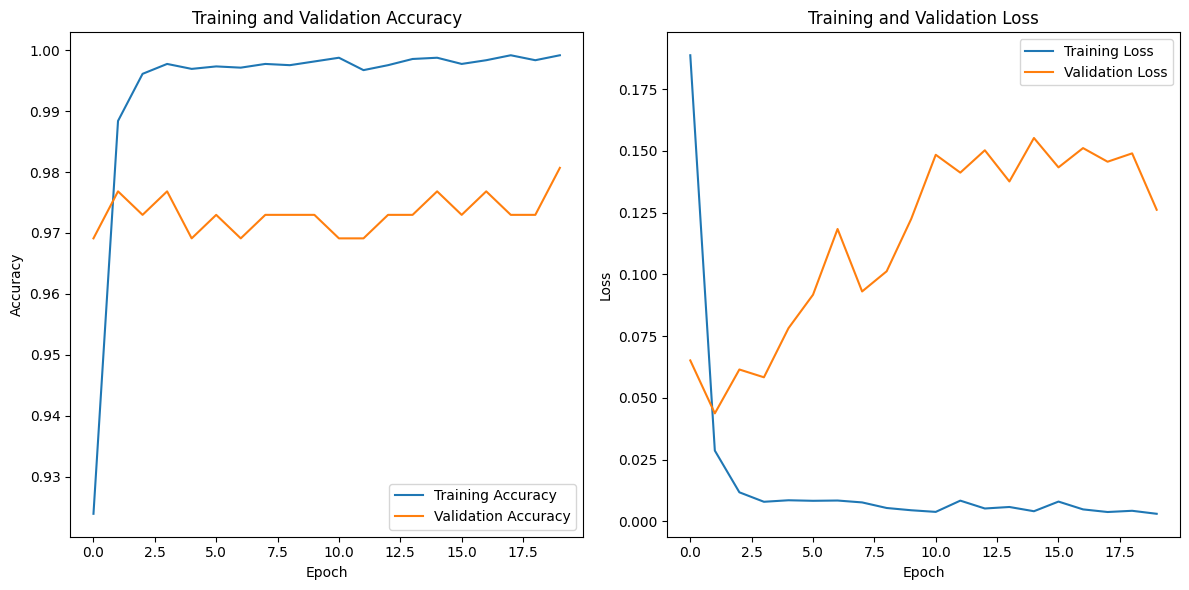

In [19]:
Main_dataset = df.copy()
Main_predication_dataset = dataset["Prediction"]

main_dataset_train, main_dataset_test, main_predication_train, main_predication_test = train_test_split(Main_dataset, Main_predication_dataset, test_size=0.05, random_state=101)

scaler = StandardScaler()
Main_train = scaler.fit_transform(main_dataset_train)
Main_test = scaler.transform(main_dataset_test)

model = Sequential([
    Dense(128, activation='relu', input_shape=(Main_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])


model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(Main_train, main_predication_train, epochs=20, batch_size=32, validation_data=(Main_test, main_predication_test), verbose=1)

main_trained = (model.predict(Main_test) > 0.5).astype(int)

conf_matrix = confusion_matrix(main_predication_test, main_trained)
f1 = f1_score(main_predication_test, main_trained)
class_report = classification_report(main_predication_test, main_trained)

print("Confusion Matrix:")
print(conf_matrix)

print("\nF1 Score:", f1)

print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Approach 2 Using LSTM

In [21]:
nltk.download('stopwords')

stop_words = stopwords.words('english')

print(stop_words)

dataset = pd.read_csv('/content/drive/MyDrive/CSV files/emails.csv')
df_main = dataset.drop(columns=["Email No.", "Prediction"])

print(df_main.sample(20))

type(stop_words)

filter = [item for item in df_main.columns if item not in stop_words]

print(filter)
# Changed df_columns to df_main.columns
print(len(df_main.columns))
print(len(filter))

dataset = pd.read_csv('/content/drive/MyDrive/CSV files/emails.csv')
df = pd.DataFrame(dataset, columns=filter)
print(len(df.columns))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [23]:

dataset = pd.read_csv('/content/drive/MyDrive/CSV files/emails.csv')

In [24]:
Main_dataset = df.copy()
Main_predication_dataset = dataset["Prediction"]

In [27]:
from tensorflow.keras.layers import Dense, Softmax, Embedding, Bidirectional, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


max_words = 10000
max_len = 200


Main_dataset = df.copy()
Main_predication_dataset = dataset["Prediction"]



main_dataset_train, main_dataset_test, main_predication_train, main_predication_test = train_test_split(Main_dataset, Main_predication_dataset, test_size=0.2, random_state=56)

scaler = StandardScaler()
Main_train = scaler.fit_transform(main_dataset_train)
Main_test = scaler.transform(main_dataset_test)


model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=Main_train.shape[1]),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.2),
    LSTM(32),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(Main_train, main_predication_train, epochs=10, batch_size=30,
                   validation_data=(Main_test, main_predication_test), verbose=1)

main_trained = (model.predict(Main_test) > 0.5).astype(int)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 1189s 9s/step - accuracy: 0.7058 - loss: 0.6247 - val_accuracy: 0.7169 - val_loss: 0.5960
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 1172s 8s/step - accuracy: 0.7082 - loss: 0.6059 - val_accuracy: 0.7169 - val_loss: 0.5975
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 1160s 8s/step - accuracy: 0.7131 - loss: 0.5988 - val_accuracy: 0.7169 - val_loss: 0.5854
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 1199s 9s/step - accuracy: 0.7110 - loss: 0.5975 - val_accuracy: 0.7256 - val_loss: 0.5828
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 1171s 8s/step - accuracy: 0.7069 - loss: 0.6021 - val_accuracy: 0.7372 - val_loss: 0.5705
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 1211s 8s/step - accuracy: 0.7220 - loss: 0.5934 - val_accuracy: 0.7362 - val_loss: 0.5715
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 1169s 8s/step - accuracy: 0.7199 - loss: 0.5886 - val_accuracy: 0.7343 - val_loss: 0.5707
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 1242s 9s/step - accuracy: 0.7250 - loss: 0.5846 - 

In [29]:
from tensorflow.keras.layers import Dropout

Confusion Matrix:
[[731  11]
 [264  29]]

F1 Score: 0.17417417417417416

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       742
           1       0.72      0.10      0.17       293

    accuracy                           0.73      1035
   macro avg       0.73      0.54      0.51      1035
weighted avg       0.73      0.73      0.65      1035



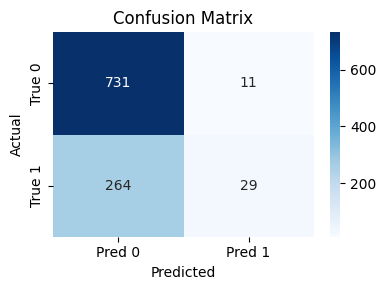

In [30]:

from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


cm = confusion_matrix(main_predication_test, main_trained)
print("Confusion Matrix:")
print(cm)


f1 = f1_score(main_predication_test, main_trained, average='binary', zero_division=0)
print("\nF1 Score:", f1)


print("\nClassification Report:")
print(classification_report(main_predication_test, main_trained, digits=2, zero_division=0))


plt.figure(figsize=(4, 3))
sns.heatmap(cm,
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.tight_layout()


plt.savefig('confusion_matrix.png', dpi=120)
plt.show()


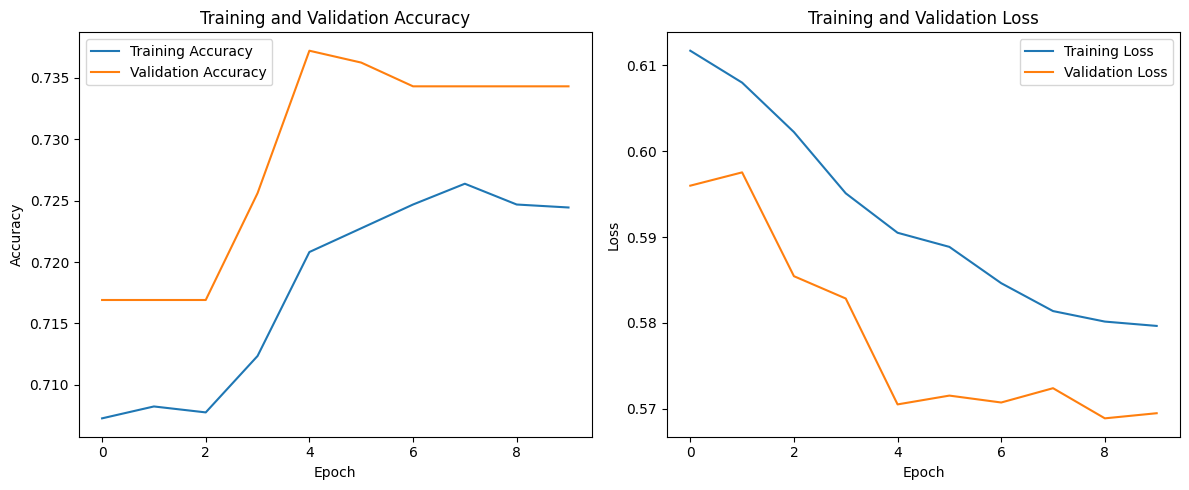

In [31]:
import matplotlib.pyplot as plt


acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(len(acc))          # 0 … N‑1


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


ax1.plot(epochs, acc,      label='Training Accuracy')
ax1.plot(epochs, val_acc,  label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()


ax2.plot(epochs, loss,     label='Training Loss')
ax2.plot(epochs, val_loss, label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()


